In [2]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('emails.csv')
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 134.2+ KB


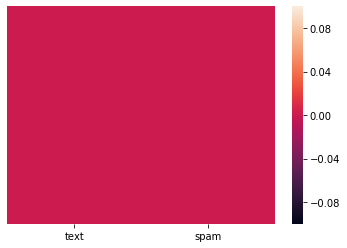

In [8]:
sns.heatmap(df.isnull(),  yticklabels=False)

In [9]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


0    4360
1    1368
Name: spam, dtype: int64

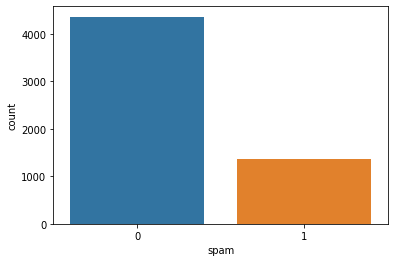

In [11]:
sns.countplot(x = "spam", data = df)
df["spam"].value_counts()


In [12]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
hamdf=df[df['spam']==0]
spamdf=df[df['spam']==1]


In [17]:
spamdf=spamdf.sample(hamdf.shape[0],replace=True)

final_dataframe=pd.concat([hamdf,spamdf],axis=0)
final_dataframe["spam"].value_counts()

1    4360
0    4360
Name: spam, dtype: int64

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(final_dataframe["text"],final_dataframe["spam"],test_size=0.2,random_state=0,shuffle=True)
X_train

582     Subject: you want to submit your website to se...
408     Subject: re : [ 879 ] ladybug  regain your con...
5310    Subject: re : thursday visit  good morning fra...
3370    Subject: re : opportunities at enron  vince ka...
4241    Subject: re : f / u to dr . kaminski @ enron f...
                              ...                        
1076    Subject: 35 % lifetime renewals - unbeatable p...
182     Subject: esecure online pharmacies  you get th...
184     Subject: hiya hon , , . . . mandamus  hi there...
4632    Subject: dinner speaker - may 23  shirley ,  t...
4100    Subject: professor bambos ' visit  shirley :  ...
Name: text, Length: 6976, dtype: object

In [19]:
import time
start=time.time()
from lightgbm import LGBMClassifier
model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",LGBMClassifier())])

model.fit(X_train,Y_train)
end=time.time()
print(f"Training Time=={end-start}")

Training Time==16.365648984909058


In [20]:
Y_pred=model.predict(X_test)
for i in Y_pred:
    if i==1:
        print("spam")
    else:
        print("Ham")

Ham
spam
Ham
spam
spam
spam
Ham
Ham
spam
spam
spam
spam
Ham
spam
spam
spam
spam
Ham
Ham
Ham
Ham
Ham
spam
Ham
Ham
spam
Ham
Ham
spam
Ham
spam
Ham
Ham
Ham
Ham
Ham
spam
Ham
Ham
spam
Ham
spam
Ham
Ham
spam
Ham
spam
spam
Ham
Ham
Ham
spam
spam
Ham
Ham
spam
spam
spam
Ham
spam
spam
spam
Ham
spam
Ham
spam
spam
Ham
spam
Ham
spam
spam
spam
spam
Ham
Ham
spam
spam
spam
spam
spam
Ham
Ham
Ham
Ham
spam
spam
spam
Ham
Ham
Ham
Ham
Ham
spam
Ham
spam
Ham
Ham
Ham
Ham
spam
Ham
Ham
Ham
Ham
spam
spam
spam
Ham
Ham
Ham
spam
Ham
Ham
Ham
Ham
Ham
Ham
Ham
spam
Ham
Ham
spam
Ham
Ham
spam
spam
spam
Ham
spam
spam
Ham
Ham
spam
spam
spam
Ham
Ham
spam
Ham
spam
spam
spam
spam
spam
spam
Ham
Ham
spam
spam
Ham
Ham
spam
spam
Ham
spam
spam
spam
spam
Ham
spam
Ham
Ham
spam
spam
spam
Ham
spam
spam
spam
spam
Ham
spam
Ham
Ham
spam
Ham
Ham
Ham
Ham
spam
Ham
Ham
spam
Ham
Ham
spam
spam
Ham
spam
spam
Ham
spam
Ham
Ham
Ham
spam
spam
spam
spam
Ham
Ham
Ham
spam
spam
spam
Ham
spam
spam
spam
Ham
spam
Ham
Ham
Ham
spam
Ham
spam
Ham
spam
spam
Ham
Ha

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)



array([[863,  15],
       [  1, 865]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       878
           1       0.98      1.00      0.99       866

    accuracy                           0.99      1744
   macro avg       0.99      0.99      0.99      1744
weighted avg       0.99      0.99      0.99      1744



In [23]:
cnf=confusion_matrix(Y_test,Y_pred)

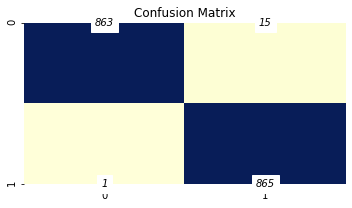

In [24]:
plt.figure(figsize = (5, 5))
annot_kws={'fontsize':10,'fontstyle':'italic','color':"k",'va':'center',"ha":'center','alpha':1,'backgroundcolor':'w'
}
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)),annot=True, cmap="YlGnBu" ,fmt="d",annot_kws=annot_kws,square=True,cbar=False)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [25]:
df1 = Y_pred

In [26]:
df1 = pd.DataFrame(df1)

In [27]:
df1.rename(columns={0: "Predicted Emails"}, inplace=True)
df1

,Predicted Emails
0,0
1,1
2,0
3,1
4,1
...,...
1739,1
1740,0
1741,0
1742,1


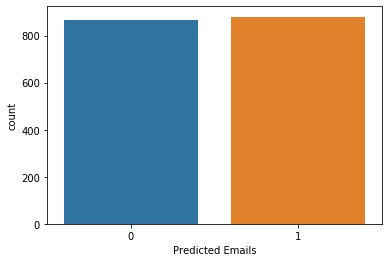

In [28]:
sns.countplot(x = "Predicted Emails", data = df1)
plt.show()


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(accuracy_score(Y_test,Y_pred))

0.9908256880733946
